## matplotlib.pyplot.violinplot

#### matplotlib.pyplot.violinplot(dataset, positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, points=100, bw_method=None, *, data=None)

Make a violin plot.

Make a violin plot for each column of dataset or each vector in sequence dataset. Each filled area extends to represent the entire data range, with optional lines at the mean, the median, the minimum, and the maximum.

#### Parameters:	
dataset : Array or a sequence of vectors.
The input data.

positions : array-like, default = [1, 2, ..., n]
Sets the positions of the violins. The ticks and limits are automatically set to match the positions.

vert : bool, default = True.
If true, creates a vertical violin plot. Otherwise, creates a horizontal violin plot.

widths : array-like, default = 0.5
Either a scalar or a vector that sets the maximal width of each violin. The default is 0.5, which uses about half of the available horizontal space.

showmeans : bool, default = False
If True, will toggle rendering of the means.

showextrema : bool, default = True
If True, will toggle rendering of the extrema.

showmedians : bool, default = False
If True, will toggle rendering of the medians.

points : scalar, default = 100
Defines the number of points to evaluate each of the gaussian kernel density estimations at.

bw_method : str, scalar or callable, optional
The method used to calculate the estimator bandwidth. This can be 'scott', 'silverman', a scalar constant or a callable. If a scalar, this will be used directly as kde.factor. If a callable, it should take a GaussianKDE instance as its only parameter and return a scalar. If None (default), 'scott' is used.

#### Returns:	
result : dict
A dictionary mapping each component of the violinplot to a list of the corresponding collection instances created. The dictionary has the following keys:

1. bodies: A list of the matplotlib.collections.PolyCollection instances containing the filled area of each violin.
2. cmeans: A matplotlib.collections.LineCollection instance created to identify the mean values of each of the violin's distribution.
3. cmins: A matplotlib.collections.LineCollection instance created to identify the bottom of each violin's distribution.
4. cmaxes: A matplotlib.collections.LineCollection instance created to identify the top of each violin's distribution.
5. cbars: A matplotlib.collections.LineCollection instance created to identify the centers of each violin's distribution.
6. cmedians: A matplotlib.collections.LineCollection instance created to identify the median values of each of the violin's distribution.

### Violin plot basics

Violin plots are similar to histograms and box plots in that they show an abstract representation of the probability distribution of the sample. Rather than showing counts of data points that fall into bins or order statistics, violin plots use kernel density estimation (KDE) to compute an empirical distribution of the sample. That computation is controlled by several parameters. This example demonstrates how to modify the number of points at which the KDE is evaluated (points) and how to modify the band-width of the KDE (bw_method).

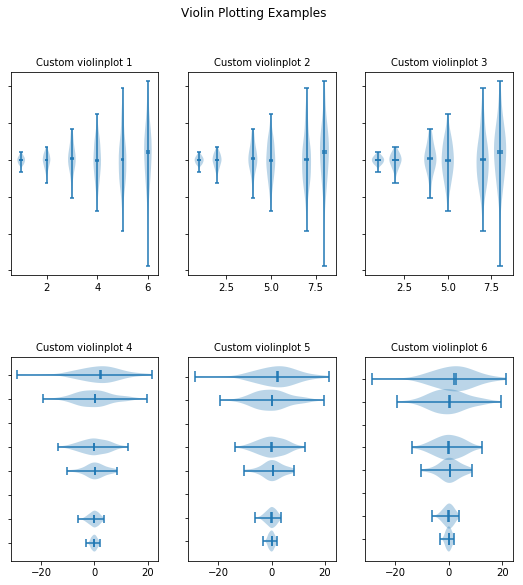

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 9))

axes[0, 0].violinplot(data, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
axes[0, 0].set_title('Custom violinplot 1', fontsize=fs)

axes[0, 1].violinplot(data, pos, points=40, widths=0.5,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')
axes[0, 1].set_title('Custom violinplot 2', fontsize=fs)

axes[0, 2].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True, bw_method=0.5)
axes[0, 2].set_title('Custom violinplot 3', fontsize=fs)

axes[1, 0].violinplot(data, pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=True)
axes[1, 0].set_title('Custom violinplot 4', fontsize=fs)

axes[1, 1].violinplot(data, pos, points=100, vert=False, widths=0.9,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')
axes[1, 1].set_title('Custom violinplot 5', fontsize=fs)

axes[1, 2].violinplot(data, pos, points=200, vert=False, widths=1.1,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method=0.5)
axes[1, 2].set_title('Custom violinplot 6', fontsize=fs)

for ax in axes.flat:
    ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

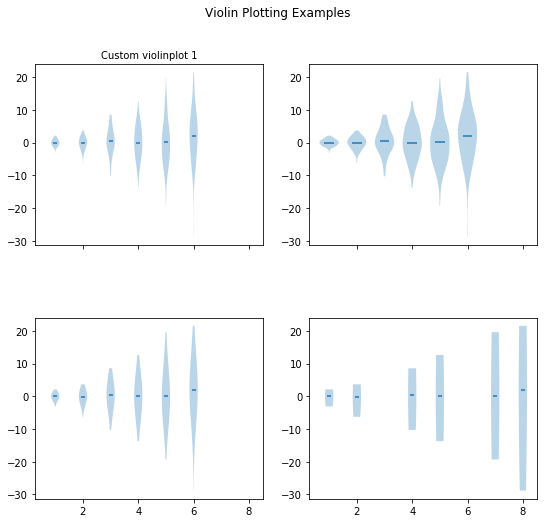

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

fig, ax = plt.subplots(2, 2, figsize=(9, 8), sharex=True)

ax[0, 0].violinplot(data, points=20, widths=0.3, showmeans=True, showextrema=False, showmedians=False, bw_method='silverman')
ax[0, 1].violinplot(data, points=20, widths=0.7, showmeans=True, showextrema=False, showmedians=False, bw_method='scott')
ax[1, 0].violinplot(data, points=100, widths=0.3, showmeans=True, showextrema=False, showmedians=False, bw_method=1)
ax[1, 1].violinplot(data, pos, points=20, widths=0.3, showmeans=True, showextrema=False, showmedians=False, bw_method=5)

ax[0, 0].set_title('Custom violinplot 1', fontsize=fs)


for ax in axes.flat:
    ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

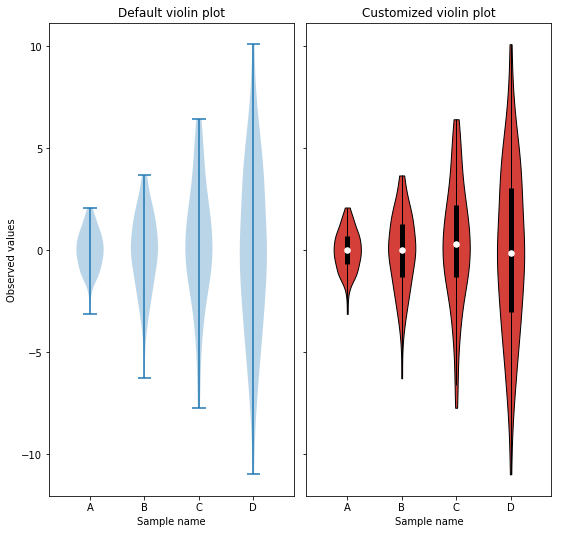

In [28]:
import matplotlib.pyplot as plt
import numpy as np


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 9), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data, range(1, 5), points=30, bw_method='silverman')

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

In [16]:
import numpy as np
a = np.arange(10)
np.clip(a, 3, 8)

array([3, 3, 3, 3, 4, 5, 6, 7, 8, 8])

In [20]:
np.clip(a, [3, 3, 3, 2, 1, 1, 8, 4, 4, 8], 7)

array([3, 3, 3, 3, 4, 5, 8, 7, 7, 8])